In [1]:
!wget https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0

--2023-03-18 11:02:55--  https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca [following]
--2023-03-18 11:02:55--  https://www.dropbox.com/sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca660d54440b58af36b8fb78a36.dl.dropboxusercontent.com/zip_download_get/Bb1tKu910HMcuE-ArjpbkQQ6LpKRyNtc88QlFNieri7cdT8lWS3AMhmC54A6hIHf_KBjGMjfTluLYvraXdG64dGDRk_hq75fS8Ja5F01flMcYA# [following]
--2023-03-18 11:02:56--  https://uca660d54440b58af36b8fb78a36.dl.dropboxusercontent.com/zip_download_get/Bb1tKu910HMcuE-ArjpbkQQ6LpKRyNtc88QlFNieri7cdT8lWS3AMhmC54A6hIHf_KBjGMjfTluLYvraXdG64dGDRk_h

In [2]:
!unzip AABXTlPlU-1f4L_VdS4wY06ca?dl=0

Archive:  AABXTlPlU-1f4L_VdS4wY06ca?dl=0
mapname:  conversion of  failed
   creating: Images/
   creating: Images/cats/
   creating: Images/dogs/
   creating: Images/horses/
   creating: Images/humans/
 extracting: Images/cats/cat.1.jpg   
 extracting: Images/cats/cat.2.jpg   
 extracting: Images/cats/cat.3.jpg   
 extracting: Images/cats/cat.4.jpg   
 extracting: Images/cats/cat.5.jpg   
 extracting: Images/cats/cat.6.jpg   
 extracting: Images/cats/cat.7.jpg   
 extracting: Images/cats/cat.8.jpg   
 extracting: Images/cats/cat.9.jpg   
 extracting: Images/dogs/dog.1.jpg   
 extracting: Images/dogs/dog.2.jpg   
 extracting: Images/dogs/dog.3.jpg   
 extracting: Images/dogs/dog.4.jpg   
 extracting: Images/dogs/dog.5.jpg   
 extracting: Images/dogs/dog.6.jpg   
 extracting: Images/dogs/dog.7.jpg   
 extracting: Images/dogs/dog.8.jpg   
 extracting: Images/dogs/dog.9.jpg   
 extracting: Images/cats/cat.10.jpg  
 extracting: Images/cats/cat.11.jpg  
 extracting: Images/cats/cat.12.jpg  


In [3]:
!ls 

'AABXTlPlU-1f4L_VdS4wY06ca?dl=0'   Images   sample_data


In [6]:
import os, shutil
folders = os.listdir("Images")
folders

['horses', 'cats', 'dogs', 'humans']

In [38]:
for f in folders:
  path = "Images/"+f
  #print(os.listdir(path))
  print(f+" "+str(len(os.listdir(path))))

horses 181
cats 181
dogs 181
humans 181


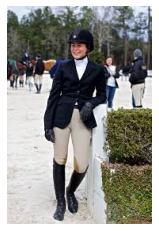

In [20]:
sample_path = "Images/humans/rider-103.jpg"
img = image.load_img(sample_path)
x = image.img_to_array(img)/255.0
plt.imshow(img)
plt.axis("off")
plt.show()

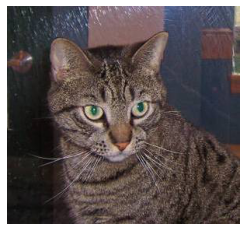

In [17]:
import keras.utils as image
from matplotlib import pyplot as plt

sample_path = "Images/cats/cat.1.jpg"
img = image.load_img(sample_path)
x = image.img_to_array(img)/255.0
plt.imshow(img)
plt.axis("off")
plt.show()

In [49]:
from keras.layers import *
from keras.models import Sequential

In [50]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 17, 17, 128)     

In [51]:
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
adam = optimizers.Adam(learning_rate=1e-4)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])

In [52]:
train_gen = ImageDataGenerator(rescale=1.0/255)
val_gen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_gen.flow_from_directory(
    'Images/',
    target_size = (150,150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = train_gen.flow_from_directory(
    'val_images/',
    target_size = (150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 724 images belonging to 4 classes.
Found 84 images belonging to 4 classes.


In [53]:
x,y = train_generator.next()
print(x.shape)
print(y.shape)

(32, 150, 150, 3)
(32, 4)


In [54]:
#Train our model

history = model.fit_generator(
    train_generator,
    epochs=50,
    steps_per_epoch=7,
    validation_data=val_generator,
    validation_steps=3
)

Epoch 1/50


<ipython-input-54-106631e3adbf>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


7/7 [==============================] - 2s 161ms/step - loss: 1.3913 - acc: 0.2366 - val_loss: 1.3807 - val_acc: 0.2500
Epoch 2/50
7/7 [==============================] - 1s 132ms/step - loss: 1.3847 - acc: 0.2723 - val_loss: 1.3806 - val_acc: 0.2500
Epoch 3/50
7/7 [==============================] - 1s 128ms/step - loss: 1.3750 - acc: 0.2277 - val_loss: 1.3745 - val_acc: 0.2619
Epoch 4/50
7/7 [==============================] - 1s 125ms/step - loss: 1.3711 - acc: 0.2857 - val_loss: 1.3685 - val_acc: 0.3333
Epoch 5/50
7/7 [==============================] - 1s 145ms/step - loss: 1.3603 - acc: 0.3214 - val_loss: 1.3706 - val_acc: 0.2500
Epoch 6/50
7/7 [==============================] - 2s 236ms/step - loss: 1.3610 - acc: 0.2589 - val_loss: 1.3525 - val_acc: 0.3333
Epoch 7/50
7/7 [==============================] - 1s 122ms/step - loss: 1.3435 - acc: 0.3259 - val_loss: 1.3412 - val_acc: 0.3452
Epoch 8/50
7/7 [==============================] - 1s 141ms/step - loss: 1.3380 - acc: 0.3839 - val_lo

In [36]:
if not os.path.isdir("val_images"):
    os.mkdir("val_images")
classes = ["dogs","cats","horses","humans"]
!ls

'AABXTlPlU-1f4L_VdS4wY06ca?dl=0'   Images   sample_data   val_images


In [37]:
for c in classes:
    p = os.path.join("val_images",c) #val_images/cats
    if not os.path.isdir(p):
        os.mkdir(p)
      
SPLIT = 0.9
for f in os.listdir("Images"):
    path = "Images/"+f
    imgs = os.listdir(path)
    
    split_size = int(SPLIT*len(imgs))
    files_to_move = imgs[split_size:]
    #print(len(files_to_move))
    #print(files_to_move)
    for img_f in files_to_move:
        src = os.path.join(path,img_f)
        dest = os.path.join("val_images/"+f,img_f)
        shutil.move(src,dest)

In [40]:
print("Training Data")
for f in folders:
    path = "Images/"+f
    print(f+ " "+str(len(os.listdir(path))))
   

print("\nValidation Data") 
for f in folders:
    path = "val_images/"+f
    print(f+ " "+str(len(os.listdir(path))))
    

Training Data
horses 181
cats 181
dogs 181
humans 181

Validation Data
horses 21
cats 21
dogs 21
humans 21


In [55]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss= history.history['val_loss']


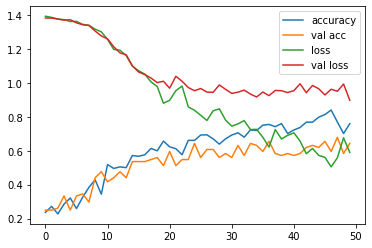

In [56]:
plt.plot(acc,label="accuracy")
plt.plot(val_acc,label="val acc")
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val loss')
plt.legend()
plt.show()

Using TensorFlow backend.


In [21]:
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1.0/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.3,
    horizontal_flip = True
    )


val_gen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_gen.flow_from_directory(
    "Images/",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

val_generator = val_gen.flow_from_directory(
    "val_images/",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)


Found 808 images belonging to 4 classes.


FileNotFoundError: ignored

In [ ]:
for x,y in train_generator:
    print(x.shape)
    print(y.shape)
    break

(32, 224, 224, 3)
(32, 4)


In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))
model.summary()





/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [ ]:
from keras.layers import * 
from keras.models import Model
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(4,activation='softmax')(d1)

model_new = Model(inputs=model.input,output=fc2)

model_new.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [ ]:
for ix in range(len(model_new.layers)):
    pass
    #print(ix,model_new.layers[ix])

for ix in range(169):
    model_new.layers[ix].trainable = False
    
model_new.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [ ]:
# Train our model
from keras.optimizers import Adam
adam = Adam(lr=0.00003)
model_new.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')


In [ ]:

history = model_new.fit_generator(
    train_generator,
    epochs = 5,
    steps_per_epoch = 5,
    validation_data = val_generator,
    validation_steps = 4   
)

Epoch 1/5
5/5 [==============================] - 3s 688ms/step - loss: 0.0924 - acc: 0.9562 - val_loss: 2.7280 - val_acc: 0.3047
Epoch 2/5
5/5 [==============================] - 3s 558ms/step - loss: 0.0681 - acc: 0.9586 - val_loss: 3.2347 - val_acc: 0.2422
